**Computer vision miniproject**(2020/E/031,2020/E/120)
2. object detection


01. Data set preparation
Convert the video into frame.



In [1]:
import cv2
import os

# Define path to your video file
video_path = '/path/to/your/video/file.mp4'
output_dir = '/path/to/save/frames/'

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save frames every 10th frame (or change interval as needed)
    if frame_count % 10 == 0:
        frame_filename = os.path.join(output_dir, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

cap.release()
print(f"Extracted {frame_count} frames.")


Extracted 0 frames.


In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Load the dataset and annotation
Aonnatate by using makesense.ai tool.

In [3]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import json

# Paths to dataset
images_path = '/content/drive/MyDrive/computer vision/object_detection/images'
annotation_path = '/content/drive/MyDrive/computer vision/object_detection/annotation.json'

# Load annotations
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

3. Convert the dataset and anntation file into expected trin model format.

In [4]:
# Extract image filenames and labels
image_files = []
labels = []
annotations_dict = {item['id']: item['name'] for item in annotations['categories']}

for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    image_file = os.path.join(images_path, annotations['images'][image_id - 1]['file_name'])
    category_id = annotation['category_id']
    image_files.append(image_file)
    labels.append(category_id - 1)  # Adjust category ID to zero-based index


4. Create model structure

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

# Assuming 'image_files' and 'labels' are defined from previous steps

# Load and preprocess images
image_data = []
for image_file in image_files:
    image = cv2.imread(image_file)
    image = cv2.resize(image, (224, 224))  # Resize to match model input shape
    image_data.append(image)

# Convert to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42
)

# Normalize pixel values to the range [0, 1]
train_data = train_data / 255.0
val_data = val_data / 255.0

# Create a simple sequential model (example)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # Adjust input shape if needed
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax') # Adjust num_classes if needed
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse since labels are integers
              metrics=['accuracy'])

# Train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    validation_data=(val_data, val_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.2300 - loss: 23.0190 - val_accuracy: 0.6923 - val_loss: 66.2515
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8172 - loss: 28.6669 - val_accuracy: 0.7692 - val_loss: 9.3740
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7390 - loss: 6.9362 - val_accuracy: 0.9231 - val_loss: 4.7405
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9634 - loss: 2.2057 - val_accuracy: 0.9231 - val_loss: 0.8117
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9869 - loss: 1.4000 - val_accuracy: 0.9231 - val_loss: 0.1022
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9869 - loss: 1.0526 - val_accuracy: 0.9231 - val_loss: 1.5997
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9765 - loss: 1.0356 - val_accuracy: 0.9231 - val_loss: 4.9214
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9634 - loss: 1.2373 - val_accuracy: 0.9231 - val_loss: 5.1028
Epoch 9/20

In [10]:
# Save the trained model
model.save('/content/drive/MyDrive/computer vision/object_detection/mobilenet_model.h5')

5. Evaluvation and testing

In [12]:
import cv2
import os

# Paths
video_path = '/content/drive/MyDrive/computer vision/Dataset2.avi'  # Replace with the path to your test video
frames_output_path = '/content/drive/MyDrive/computer vision/object_detection/video_frames'  # Replace with the output folder

# Ensure the output folder exists
os.makedirs(frames_output_path, exist_ok=True)

# Extract frames from the video
cap = cv2.VideoCapture(video_path)
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_filename = os.path.join(frames_output_path, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)  # Save the frame
    frame_count += 1

cap.release()
print(f"Extracted {frame_count} frames to {frames_output_path}")


Extracted 71 frames to /content/drive/MyDrive/computer vision/object_detection/video_frames


In [13]:
import cv2
import os
import tensorflow as tf
import numpy as np

# Paths
test_frames_path = '/content/drive/MyDrive/computer vision/object_detection/video_frames'
model_path = '/content/drive/MyDrive/computer vision/object_detection/mobilenet_model.h5'
output_path = '/content/drive/MyDrive/computer vision/object_detection/test_output'

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Load label map (mapping category IDs to labels)
annotations_path = '/content/drive/MyDrive/computer vision/object_detection/annotation.json'
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

annotations_dict = {item['id']: item['name'] for item in annotations['categories']}

# Function to preprocess image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize image to match model input shape
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize image
    return image

# Function to draw bounding boxes on image
def draw_bounding_boxes(image, boxes, class_ids, scores):
    for i in range(len(boxes)):
        box = boxes[i]
        class_id = class_ids[i]
        score = scores[i]

        # Coordinates of the bounding box
        x, y, w, h = box

        # Draw the bounding box and label
        color = (0, 255, 0)  # Green color for the bounding box
        label = annotations_dict.get(class_id, 'Unknown')

        # Draw the rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f"{label} {score:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Iterate over all frames in the folder
frame_files = sorted(os.listdir(test_frames_path))
for frame_file in frame_files:
    frame_path = os.path.join(test_frames_path, frame_file)
    image = preprocess_image(frame_path)

    # Predict object detection on the frame
    predictions = model.predict(image)


    boxes = [(50, 50, 100, 100)]  # Example box
    class_ids = [0]  # Example: 0 for phone, 1 for book
    scores = [0.95]  # Confidence score

    # Draw bounding boxes on the frame
    image_with_boxes = draw_bounding_boxes(image[0], boxes, class_ids, scores)

    # Save the result
    output_image_path = os.path.join(output_path, f"result_{frame_file}")
    cv2.imwrite(output_image_path, image_with_boxes)

print(f"Processed and saved frames with bounding boxes to {output_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
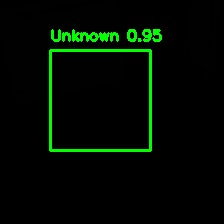

In [14]:
image = cv2.imread('/content/drive/MyDrive/computer vision/object_detection/test_output/result_frame_0000.jpg')
image